In [23]:
import pandas as pd

train = pd.read_csv('../../data/train.csv')
valid = pd.read_csv('../../data/dev.csv')
test = pd.read_csv('../../data/test.csv')
output = pd.read_csv('../lightning_logs/0.8935749_jhgan-ko-sroberta-multitask/output.csv')
test_target = pd.read_csv('../../data/sample_submission.csv')


array([[<Axes: title={'center': 'label'}>]], dtype=object)

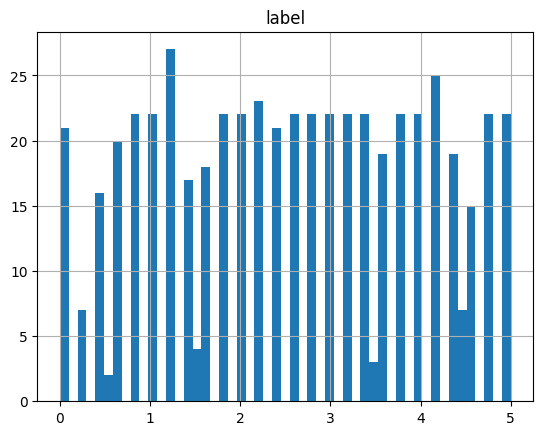

In [24]:
valid.hist(column='label', bins=51)

In [25]:
output

,id,target
0,boostcamp-sts-v1-test-000,3.9
1,boostcamp-sts-v1-test-001,4.2
2,boostcamp-sts-v1-test-002,2.8
3,boostcamp-sts-v1-test-003,0.1
4,boostcamp-sts-v1-test-004,4.2
...,...,...
1095,boostcamp-sts-v1-test-1095,1.5
1096,boostcamp-sts-v1-test-1096,4.0
1097,boostcamp-sts-v1-test-1097,3.9
1098,boostcamp-sts-v1-test-1098,3.9


In [26]:
# for test, make a new column 'output' and fill it with the output
test['target'] = output['target']

In [27]:
test.head(30)

,id,source,sentence_1,sentence_2,target
0,boostcamp-sts-v1-test-000,petition-sampled,가상화폐거래소 폐쇄하지 말고,가상화폐 거래소 폐쇄 반대합니다,3.9
1,boostcamp-sts-v1-test-001,petition-sampled,뇌물적폐1호 640만달라 70억 뇌물받은 권양숙 구속하고 재산을 몰수하라,뇌물적폐 원조 640만달라 70억 뇌물받은 권양숙 구속하고 재산을 몰수하세요,4.2
2,boostcamp-sts-v1-test-002,petition-rtt,기무사 영관급의 하극상 정말 이대로 방관하는게 민주주의 인지요,그냥 가만히 있는게 진짜 민주주의인가요?,2.8
3,boostcamp-sts-v1-test-003,nsmc-sampled,화까지가 한계였다.,기대가 너무 컸다...,0.1
4,boostcamp-sts-v1-test-004,slack-rtt,왜 혼자 있지.. ㅠㅠ,왜 혼자야.. ㅠㅠ,4.2
5,boostcamp-sts-v1-test-005,nsmc-sampled,전개가 너무 부실하고 몰입력은 아예 기대할 수가 없다.,전개가 황당해서 몰입할 수가 없었다,3.2
6,boostcamp-sts-v1-test-006,petition-rtt,비흡연자의 인권을 지켜주세요.,비흡연자의 인권을 존중해주세요.,4.3
7,boostcamp-sts-v1-test-007,nsmc-sampled,스튜어트 고든과 데니스 호퍼에게 정말 실망한 작품,무언가(힐링이든 감동이든 재미든)를 기대하며 봤지만 완벽히 실망한 영화.,1.2
8,boostcamp-sts-v1-test-008,nsmc-sampled,김래원 캐릭터는 전지전능.,남주여주 둘다 캐릭터가 그닥 매력적이지가 않음.,0.7
9,boostcamp-sts-v1-test-009,slack-sampled,빛을 쏟는 스까이아이아이아이야이야~,빛을 쏟는 스까이아이아이아이아이야~,4.3


<Axes: >

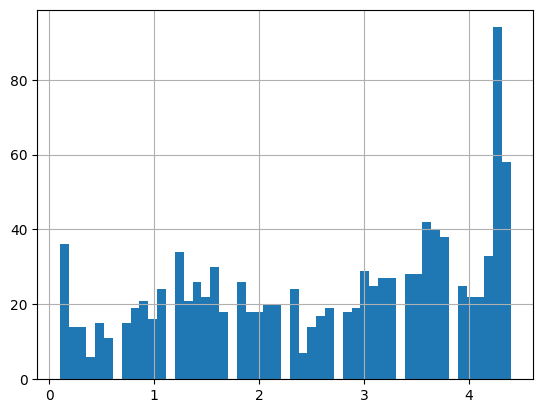

In [28]:
# histogram of the output
test['target'].hist(bins=51)

In [29]:
# make a new df which has test['target'] > 4
test_mt4 = test[test['target'] > 4]

In [30]:
test_mt4.describe()

,target
count,207.000000
mean,4.290821
std,0.092761
min,4.100000
25%,4.200000
50%,4.300000
75%,4.400000
max,4.400000


In [31]:
# check counts of each label
test_mt4['source'].value_counts()

source
petition-rtt        61
petition-sampled    51
slack-rtt           40
nsmc-rtt            28
slack-sampled       15
nsmc-sampled        12
Name: count, dtype: int64

In [32]:
test_mt4_pet = test_mt4[test_mt4['source'] == 'petition-sampled']
test_mt4_pet.head(10)

,id,source,sentence_1,sentence_2,target
1,boostcamp-sts-v1-test-001,petition-sampled,뇌물적폐1호 640만달라 70억 뇌물받은 권양숙 구속하고 재산을 몰수하라,뇌물적폐 원조 640만달라 70억 뇌물받은 권양숙 구속하고 재산을 몰수하세요,4.2
19,boostcamp-sts-v1-test-019,petition-sampled,낙태죄 폐지해 주세요,낙태죄 폐지해야 합니다.,4.3
45,boostcamp-sts-v1-test-045,petition-sampled,조두순 출소 반대합니다!,조두순 출소 반대합니다!!,4.4
60,boostcamp-sts-v1-test-060,petition-sampled,가상화폐 거래소 페쇄 반대,가상화폐거래소 폐쇠 반대합니다,4.2
85,boostcamp-sts-v1-test-085,petition-sampled,외상센터지원청원합니다,외상센터지원청원합니다!!!,4.4
101,boostcamp-sts-v1-test-101,petition-sampled,조재현 김기덕 처벌해주세요,조재현 김기덕을 처벌해주세요,4.4
117,boostcamp-sts-v1-test-117,petition-sampled,여성가족부폐지해주세요,여성가족부 폐지해주세요,4.4
120,boostcamp-sts-v1-test-120,petition-sampled,청소년법 폐지바랍니다,청소년보호법 폐지바랍니다,4.3
177,boostcamp-sts-v1-test-177,petition-sampled,가상화폐 제제 반대합니다,가상화폐 제재를 반대합니다.,4.3
197,boostcamp-sts-v1-test-197,petition-sampled,이명박 출국 정지 해주세요,이명박 출국 금지해주세요!!!,4.3


In [33]:
valid

,id,source,sentence_1,sentence_2,label,binary-label
0,boostcamp-sts-v1-dev-000,nsmc-sampled,액션은개뿔 총몇번쏘고 끝입니다,액션은 흉내만 내고 그마저도 후반부에는 슬로우모션 처리,2.0,0.0
1,boostcamp-sts-v1-dev-001,slack-rtt,감격스러워 입막으심?,너무 감동해서 입 다물어?,3.4,1.0
2,boostcamp-sts-v1-dev-002,nsmc-rtt,이번 년도에 본 영화 중 가장 최악의 영화......,올해 본 영화 중 최악...,4.0,1.0
3,boostcamp-sts-v1-dev-003,slack-rtt,특히 평소 뮤직채널에 많은 영감을 불어넣어주시는!,"특히, 당신은 항상 많은 음악 채널에 영감을 줍니다!",3.4,1.0
4,boostcamp-sts-v1-dev-004,slack-sampled,다음 밥스테이지가 기대됩니다~ ㅎ,다음 후기도 기대됩니다~~,1.4,0.0
...,...,...,...,...,...,...
545,boostcamp-sts-v1-dev-545,nsmc-sampled,"사회적 이슈를 다루고 있는 가슴 찡한 드라마네요,,,",정말 가슴을 따뜻하게 한 좋은 드라마...,2.0,0.0
546,boostcamp-sts-v1-dev-546,slack-rtt,(비타민 먹는 장면),(비타민을 먹는 장면),4.8,1.0
547,boostcamp-sts-v1-dev-547,nsmc-sampled,내용이 뭔 내용인지도 모르겠음,무슨의미로 만들었는지 모르겠음..,2.4,0.0
548,boostcamp-sts-v1-dev-548,slack-rtt,"(예: 주말에는 개인캘린더만, 업무시간에는 업무 캘린더만 보기)","(예: 주말에는 개인캘린더만 보고, 업무시간에는 업무캘린더만 보기)",5.0,1.0


array([[<Axes: title={'center': 'label'}>]], dtype=object)

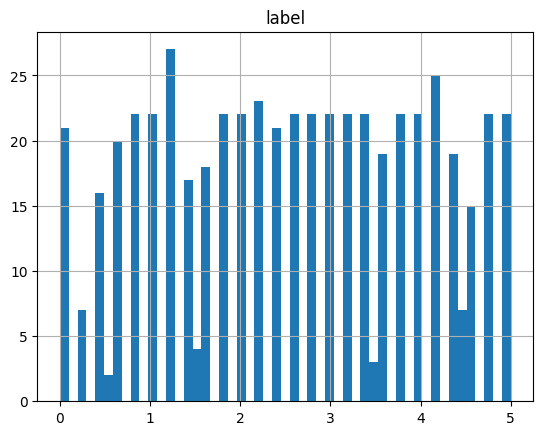

In [34]:
valid.hist(column='label', bins=51)

In [35]:
valid_odd = valid[valid['label']*10 % 2 == 1]
valid_even = valid[valid['label']*10 % 2 == 0]

valid_odd.describe()

,label,binary-label
count,16.000000,16.000
mean,3.062500,0.625
std,1.590335,0.500
min,0.500000,0.000
25%,1.500000,0.000
50%,3.500000,1.000
75%,4.500000,1.000
max,4.500000,1.000


In [36]:
valid_even.describe()

,label,binary-label
count,534.000000,534.000000
mean,2.569663,0.516854
std,1.454571,0.500184
min,0.000000,0.000000
25%,1.200000,0.000000
50%,2.600000,1.000000
75%,3.800000,1.000000
max,5.000000,1.000000


In [37]:
valid_odd.head(20)

,id,source,sentence_1,sentence_2,label,binary-label
66,boostcamp-sts-v1-dev-066,petition-rtt,"사대강 국민들이 그렇게 반대 했는데( 제주도 무사증, 난민법 ) 사대강 처럼 됩니다.","4대강 국민이 반대했지만(제주도 무사증, 난민법) 4대강처럼 된다.",4.5,1.0
72,boostcamp-sts-v1-dev-072,petition-sampled,식약처 개혁 청원합니다,식약처 압수수색이 필요합니다,1.5,0.0
92,boostcamp-sts-v1-dev-092,petition-sampled,부산청소년폭행 강력하게 처벌을 청원합니다,부산여중생 가해학생들 강력한 처벌을 청원합니다.,3.5,1.0
116,boostcamp-sts-v1-dev-116,slack-sampled,"혹여나 빠진 정보가 있다면, 댓글로 의견주시면 감사하겠습니다 !",만약 더 신박한 디자인이 생각나시는 분은 댓글로 이미지 남겨주시면 감사하겠습니다~!,1.5,0.0
137,boostcamp-sts-v1-dev-137,slack-rtt,오늘은 하이브 (전 빅히트) 의 자회사인 쏘스뮤직에서 르세라핌 이 첫 곡 낸다고도 ...,오늘 르세라핌은 하이브(구 빅히트)의 자회사인 쏘스뮤직에서 첫 번째 곡을 발매한다고...,4.5,1.0
163,boostcamp-sts-v1-dev-163,slack-sampled,오늘 안에 가장 많은 표를 받으신 분께는 상품권을 전달드리도록 하겠습니다!,채택된 아이디어를 내주시는 분께는 을 보내드리겠습니다아~ㅊㅋㅊㅋ!!,1.5,0.0
169,boostcamp-sts-v1-dev-169,petition-sampled,나경원 평창 올림픽 위원직 사퇴 청원,나경원 평창올림픽 위원회 파면시켜주세요,3.5,1.0
170,boostcamp-sts-v1-dev-170,petition-rtt,제발 아무것도‥하지마세요,제발 아무것도 하지마...,4.5,1.0
289,boostcamp-sts-v1-dev-289,petition-sampled,다자녀 청약조건을 개선해주세요,1주택 청약자의 주택가격을 구분해주세요,0.5,0.0
329,boostcamp-sts-v1-dev-329,petition-sampled,미세먼지 대책세워주세요,미세먼지 대책 세워주십시오,4.5,1.0


In [38]:
valid_odd['label'].describe()

count    16.000000
mean      3.062500
std       1.590335
min       0.500000
25%       1.500000
50%       3.500000
75%       4.500000
max       4.500000
Name: label, dtype: float64

In [39]:
import torch


def pearson_corrcoef(x, y):
    mean_x = torch.mean(x)
    mean_y = torch.mean(y)
    cov = torch.sum((x - mean_x) * (y - mean_y))
    std_x = torch.sqrt(torch.sum((x - mean_x) ** 2))
    std_y = torch.sqrt(torch.sum((y - mean_y) ** 2))
    return cov / (std_x * std_y)

target = torch.tensor([5.0, 3.0, 0.0, 2.0])
preds = torch.tensor([4.2, 3.57, 0.2, 1.5])

pearson_corr = pearson_corrcoef(target, preds)
print(pearson_corr)

tensor(0.9557)


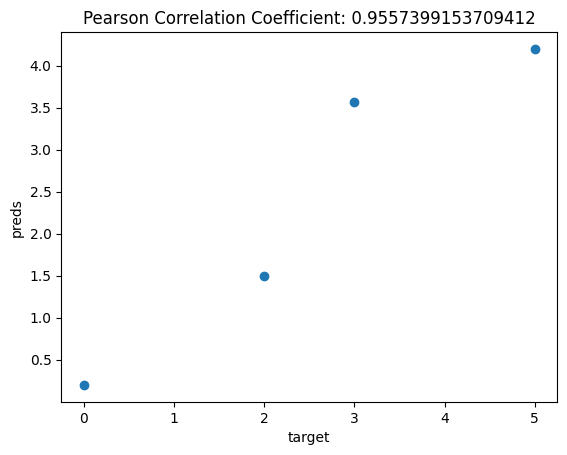

In [40]:
# visualize the correlation
import matplotlib.pyplot as plt

plt.scatter(target, preds)
plt.xlabel('target')
plt.ylabel('preds')
plt.title(f'Pearson Correlation Coefficient: {pearson_corr.item()}')
plt.show()

In [41]:
valid

,id,source,sentence_1,sentence_2,label,binary-label
0,boostcamp-sts-v1-dev-000,nsmc-sampled,액션은개뿔 총몇번쏘고 끝입니다,액션은 흉내만 내고 그마저도 후반부에는 슬로우모션 처리,2.0,0.0
1,boostcamp-sts-v1-dev-001,slack-rtt,감격스러워 입막으심?,너무 감동해서 입 다물어?,3.4,1.0
2,boostcamp-sts-v1-dev-002,nsmc-rtt,이번 년도에 본 영화 중 가장 최악의 영화......,올해 본 영화 중 최악...,4.0,1.0
3,boostcamp-sts-v1-dev-003,slack-rtt,특히 평소 뮤직채널에 많은 영감을 불어넣어주시는!,"특히, 당신은 항상 많은 음악 채널에 영감을 줍니다!",3.4,1.0
4,boostcamp-sts-v1-dev-004,slack-sampled,다음 밥스테이지가 기대됩니다~ ㅎ,다음 후기도 기대됩니다~~,1.4,0.0
...,...,...,...,...,...,...
545,boostcamp-sts-v1-dev-545,nsmc-sampled,"사회적 이슈를 다루고 있는 가슴 찡한 드라마네요,,,",정말 가슴을 따뜻하게 한 좋은 드라마...,2.0,0.0
546,boostcamp-sts-v1-dev-546,slack-rtt,(비타민 먹는 장면),(비타민을 먹는 장면),4.8,1.0
547,boostcamp-sts-v1-dev-547,nsmc-sampled,내용이 뭔 내용인지도 모르겠음,무슨의미로 만들었는지 모르겠음..,2.4,0.0
548,boostcamp-sts-v1-dev-548,slack-rtt,"(예: 주말에는 개인캘린더만, 업무시간에는 업무 캘린더만 보기)","(예: 주말에는 개인캘린더만 보고, 업무시간에는 업무캘린더만 보기)",5.0,1.0


In [42]:
# drop valid['label'], 'binary_label'
valid.drop(columns=['label', 'binary-label'], inplace=True)

In [43]:
# save as csv
valid.to_csv('../../data/valid_dropped_label.csv', index=False)

In [44]:
sample_submission = pd.read_csv('../../data/sample_submission.csv')
sample_submission

,id,target
0,boostcamp-sts-v1-test-000,3.5
1,boostcamp-sts-v1-test-001,2.1
2,boostcamp-sts-v1-test-002,2.3
3,boostcamp-sts-v1-test-003,1.0
4,boostcamp-sts-v1-test-004,4.0
...,...,...
1095,boostcamp-sts-v1-test-1095,4.2
1096,boostcamp-sts-v1-test-1096,4.0
1097,boostcamp-sts-v1-test-1097,2.8
1098,boostcamp-sts-v1-test-1098,3.6


In [45]:
# drop rows and make data count 550
sample_submission.drop(index=range(0, 550), inplace=True)
sample_submission


,id,target
550,boostcamp-sts-v1-test-550,1.2
551,boostcamp-sts-v1-test-551,2.8
552,boostcamp-sts-v1-test-552,1.5
553,boostcamp-sts-v1-test-553,2.8
554,boostcamp-sts-v1-test-554,3.3
...,...,...
1095,boostcamp-sts-v1-test-1095,4.2
1096,boostcamp-sts-v1-test-1096,4.0
1097,boostcamp-sts-v1-test-1097,2.8
1098,boostcamp-sts-v1-test-1098,3.6


In [46]:
sample_submission.describe()

,target
count,550.000000
mean,2.966909
std,1.120449
min,1.000000
25%,2.000000
50%,2.900000
75%,3.900000
max,5.000000


In [47]:
sample_submission.to_csv('../../data/sample_submission_550.csv', index=False)

In [48]:
valid_pred_label = pd.read_csv('../../data/output_valid_dropped_label.csv')
valid_pred_label

,id,target
0,boostcamp-sts-v1-test-550,1.0
1,boostcamp-sts-v1-test-551,3.4
2,boostcamp-sts-v1-test-552,4.1
3,boostcamp-sts-v1-test-553,3.4
4,boostcamp-sts-v1-test-554,1.1
...,...,...
545,boostcamp-sts-v1-test-1095,2.9
546,boostcamp-sts-v1-test-1096,4.3
547,boostcamp-sts-v1-test-1097,1.3
548,boostcamp-sts-v1-test-1098,4.4


In [49]:
#change column name target -> preds
valid_pred_label.rename(columns={'target': 'preds'}, inplace=True)
valid_pred_label

,id,preds
0,boostcamp-sts-v1-test-550,1.0
1,boostcamp-sts-v1-test-551,3.4
2,boostcamp-sts-v1-test-552,4.1
3,boostcamp-sts-v1-test-553,3.4
4,boostcamp-sts-v1-test-554,1.1
...,...,...
545,boostcamp-sts-v1-test-1095,2.9
546,boostcamp-sts-v1-test-1096,4.3
547,boostcamp-sts-v1-test-1097,1.3
548,boostcamp-sts-v1-test-1098,4.4


In [50]:
valid = pd.read_csv('../../data/dev.csv')
valid

,id,source,sentence_1,sentence_2,label,binary-label
0,boostcamp-sts-v1-dev-000,nsmc-sampled,액션은개뿔 총몇번쏘고 끝입니다,액션은 흉내만 내고 그마저도 후반부에는 슬로우모션 처리,2.0,0.0
1,boostcamp-sts-v1-dev-001,slack-rtt,감격스러워 입막으심?,너무 감동해서 입 다물어?,3.4,1.0
2,boostcamp-sts-v1-dev-002,nsmc-rtt,이번 년도에 본 영화 중 가장 최악의 영화......,올해 본 영화 중 최악...,4.0,1.0
3,boostcamp-sts-v1-dev-003,slack-rtt,특히 평소 뮤직채널에 많은 영감을 불어넣어주시는!,"특히, 당신은 항상 많은 음악 채널에 영감을 줍니다!",3.4,1.0
4,boostcamp-sts-v1-dev-004,slack-sampled,다음 밥스테이지가 기대됩니다~ ㅎ,다음 후기도 기대됩니다~~,1.4,0.0
...,...,...,...,...,...,...
545,boostcamp-sts-v1-dev-545,nsmc-sampled,"사회적 이슈를 다루고 있는 가슴 찡한 드라마네요,,,",정말 가슴을 따뜻하게 한 좋은 드라마...,2.0,0.0
546,boostcamp-sts-v1-dev-546,slack-rtt,(비타민 먹는 장면),(비타민을 먹는 장면),4.8,1.0
547,boostcamp-sts-v1-dev-547,nsmc-sampled,내용이 뭔 내용인지도 모르겠음,무슨의미로 만들었는지 모르겠음..,2.4,0.0
548,boostcamp-sts-v1-dev-548,slack-rtt,"(예: 주말에는 개인캘린더만, 업무시간에는 업무 캘린더만 보기)","(예: 주말에는 개인캘린더만 보고, 업무시간에는 업무캘린더만 보기)",5.0,1.0


In [51]:
valid_pred_label['label'] = valid['label']
valid_pred_label['sentence_1'] = valid['sentence_1']
valid_pred_label['sentence_2'] = valid['sentence_2']
valid_pred_label

,id,preds,label,sentence_1,sentence_2
0,boostcamp-sts-v1-test-550,1.0,2.0,액션은개뿔 총몇번쏘고 끝입니다,액션은 흉내만 내고 그마저도 후반부에는 슬로우모션 처리
1,boostcamp-sts-v1-test-551,3.4,3.4,감격스러워 입막으심?,너무 감동해서 입 다물어?
2,boostcamp-sts-v1-test-552,4.1,4.0,이번 년도에 본 영화 중 가장 최악의 영화......,올해 본 영화 중 최악...
3,boostcamp-sts-v1-test-553,3.4,3.4,특히 평소 뮤직채널에 많은 영감을 불어넣어주시는!,"특히, 당신은 항상 많은 음악 채널에 영감을 줍니다!"
4,boostcamp-sts-v1-test-554,1.1,1.4,다음 밥스테이지가 기대됩니다~ ㅎ,다음 후기도 기대됩니다~~
...,...,...,...,...,...
545,boostcamp-sts-v1-test-1095,2.9,2.0,"사회적 이슈를 다루고 있는 가슴 찡한 드라마네요,,,",정말 가슴을 따뜻하게 한 좋은 드라마...
546,boostcamp-sts-v1-test-1096,4.3,4.8,(비타민 먹는 장면),(비타민을 먹는 장면)
547,boostcamp-sts-v1-test-1097,1.3,2.4,내용이 뭔 내용인지도 모르겠음,무슨의미로 만들었는지 모르겠음..
548,boostcamp-sts-v1-test-1098,4.4,5.0,"(예: 주말에는 개인캘린더만, 업무시간에는 업무 캘린더만 보기)","(예: 주말에는 개인캘린더만 보고, 업무시간에는 업무캘린더만 보기)"


In [52]:
# change column order
valid_pred_label = valid_pred_label[['sentence_1', 'sentence_2', 'label', 'preds']]
valid_pred_label

,sentence_1,sentence_2,label,preds
0,액션은개뿔 총몇번쏘고 끝입니다,액션은 흉내만 내고 그마저도 후반부에는 슬로우모션 처리,2.0,1.0
1,감격스러워 입막으심?,너무 감동해서 입 다물어?,3.4,3.4
2,이번 년도에 본 영화 중 가장 최악의 영화......,올해 본 영화 중 최악...,4.0,4.1
3,특히 평소 뮤직채널에 많은 영감을 불어넣어주시는!,"특히, 당신은 항상 많은 음악 채널에 영감을 줍니다!",3.4,3.4
4,다음 밥스테이지가 기대됩니다~ ㅎ,다음 후기도 기대됩니다~~,1.4,1.1
...,...,...,...,...
545,"사회적 이슈를 다루고 있는 가슴 찡한 드라마네요,,,",정말 가슴을 따뜻하게 한 좋은 드라마...,2.0,2.9
546,(비타민 먹는 장면),(비타민을 먹는 장면),4.8,4.3
547,내용이 뭔 내용인지도 모르겠음,무슨의미로 만들었는지 모르겠음..,2.4,1.3
548,"(예: 주말에는 개인캘린더만, 업무시간에는 업무 캘린더만 보기)","(예: 주말에는 개인캘린더만 보고, 업무시간에는 업무캘린더만 보기)",5.0,4.4


In [53]:
# pearson
target = torch.tensor(valid_pred_label['label'])
preds = torch.tensor(valid_pred_label['preds'])

pearson_corr = pearson_corrcoef(target, preds)
print(pearson_corr)

tensor(0.8883, dtype=torch.float64)


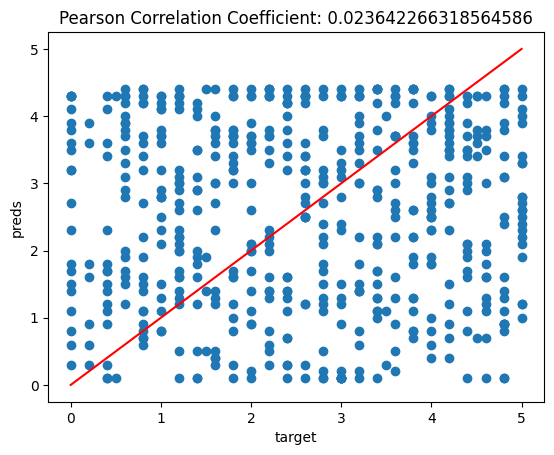

In [64]:
# visualize the correlation
plt.scatter(target, preds)
plt.xlabel('target')
plt.ylabel('preds')
plt.title(f'Pearson Correlation Coefficient: {pearson_corr.item()}')
# draw y=x line
plt.plot([0, 5], [0, 5], color='red')
plt.show()


In [55]:
# inference_valid.py 만들고 실행 -> output.csv 생성(550 rows)
# valid랑 합쳐서 correlation 계산

valid = pd.read_csv('../../data/dev.csv')
inference_valid = pd.read_csv('../lightning_logs/0.8935749_jhgan-ko-sroberta-multitask/output-0.8935749_jhgan-ko-sroberta-multitask.csv')

In [56]:
inference_valid

,id,target
0,boostcamp-sts-v1-test-000,3.9
1,boostcamp-sts-v1-test-001,4.2
2,boostcamp-sts-v1-test-002,2.8
3,boostcamp-sts-v1-test-003,0.1
4,boostcamp-sts-v1-test-004,4.2
...,...,...
1095,boostcamp-sts-v1-test-1095,1.5
1096,boostcamp-sts-v1-test-1096,4.0
1097,boostcamp-sts-v1-test-1097,3.9
1098,boostcamp-sts-v1-test-1098,3.9


In [57]:
valid['preds'] = inference_valid['target']
valid

,id,source,sentence_1,sentence_2,label,binary-label,preds
0,boostcamp-sts-v1-dev-000,nsmc-sampled,액션은개뿔 총몇번쏘고 끝입니다,액션은 흉내만 내고 그마저도 후반부에는 슬로우모션 처리,2.0,0.0,3.9
1,boostcamp-sts-v1-dev-001,slack-rtt,감격스러워 입막으심?,너무 감동해서 입 다물어?,3.4,1.0,4.2
2,boostcamp-sts-v1-dev-002,nsmc-rtt,이번 년도에 본 영화 중 가장 최악의 영화......,올해 본 영화 중 최악...,4.0,1.0,2.8
3,boostcamp-sts-v1-dev-003,slack-rtt,특히 평소 뮤직채널에 많은 영감을 불어넣어주시는!,"특히, 당신은 항상 많은 음악 채널에 영감을 줍니다!",3.4,1.0,0.1
4,boostcamp-sts-v1-dev-004,slack-sampled,다음 밥스테이지가 기대됩니다~ ㅎ,다음 후기도 기대됩니다~~,1.4,0.0,4.2
...,...,...,...,...,...,...,...
545,boostcamp-sts-v1-dev-545,nsmc-sampled,"사회적 이슈를 다루고 있는 가슴 찡한 드라마네요,,,",정말 가슴을 따뜻하게 한 좋은 드라마...,2.0,0.0,1.7
546,boostcamp-sts-v1-dev-546,slack-rtt,(비타민 먹는 장면),(비타민을 먹는 장면),4.8,1.0,4.4
547,boostcamp-sts-v1-dev-547,nsmc-sampled,내용이 뭔 내용인지도 모르겠음,무슨의미로 만들었는지 모르겠음..,2.4,0.0,4.4
548,boostcamp-sts-v1-dev-548,slack-rtt,"(예: 주말에는 개인캘린더만, 업무시간에는 업무 캘린더만 보기)","(예: 주말에는 개인캘린더만 보고, 업무시간에는 업무캘린더만 보기)",5.0,1.0,2.4


In [58]:
# pearson
target = torch.tensor(valid['label'])
preds = torch.tensor(valid['preds'])

pearson_corr = pearson_corrcoef(target, preds)
print(pearson_corr)

tensor(0.0236, dtype=torch.float64)


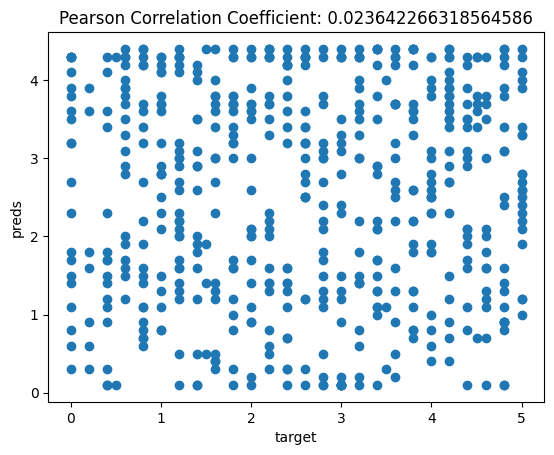

In [59]:
# visualize and save image
plt.scatter(target, preds)
plt.xlabel('target')
plt.ylabel('preds')
plt.title(f'Pearson Correlation Coefficient: {pearson_corr.item()}')
plt.savefig('../../data/valid_corr.png')


In [61]:
# subfolders 하위에 있는 valid_target_preds.csv의 절대경로를 valid_list에 저장
valid_list = []
for subfolder in subfolders:
    files = [f.path for f in os.scandir(subfolder) if f.is_file()]
    for file in files:
        if 'valid_target_preds.csv' in file:
            valid_list.append(file)
valid_list

['/data/ephemeral/home/heejun/STS/lightning_logs/0.8613058_klue-roberta-base-attention_masked/valid_target_preds.csv',
 '/data/ephemeral/home/heejun/STS/lightning_logs/0.8718952_upskyy-kf-deberta-multitask/valid_target_preds.csv',
 '/data/ephemeral/home/heejun/STS/lightning_logs/0.8613058_klue-roberta-base-attention_masked_seed_0/valid_target_preds.csv',
 '/data/ephemeral/home/heejun/STS/lightning_logs/0.8813921_klue-roberta-base/valid_target_preds.csv',
 '/data/ephemeral/home/heejun/STS/lightning_logs/0.8935749_jhgan-ko-sroberta-multitask/valid_target_preds.csv',
 '/data/ephemeral/home/heejun/STS/lightning_logs/0.8964779_upskyy-kf-deberta-multitask/valid_target_preds.csv']

In [62]:
v0 = pd.read_csv(valid_list[0])

# for each row, if abs(label-preds) > 1, make a new df and add the row
v0_diff = v0[abs(v0['label'] - v0['preds']) > 1]
v0_diff.head(20)

,id,source,sentence_1,sentence_2,label,binary-label,preds
0,boostcamp-sts-v1-dev-000,nsmc-sampled,액션은개뿔 총몇번쏘고 끝입니다,액션은 흉내만 내고 그마저도 후반부에는 슬로우모션 처리,2.0,0.0,0.8
11,boostcamp-sts-v1-dev-011,slack-rtt,영양분 편차가 균등해짐.,영양소 변화가 균일해집니다.,2.8,1.0,3.9
18,boostcamp-sts-v1-dev-018,slack-rtt,코파일럿은 사랑입니다,조종사는 사랑입니다,3.2,1.0,0.8
28,boostcamp-sts-v1-dev-028,slack-rtt,당연히 둘다 먹는거 아닌가요!,물론 둘 다 먹지는 않는다!,0.8,0.0,1.9
29,boostcamp-sts-v1-dev-029,slack-sampled,엥 제가 2등인가요? ㅋㅋ,엥 은메달인가요 제가? ㅋㅋ,2.6,1.0,0.4
51,boostcamp-sts-v1-dev-051,petition-rtt,여자지만 군가산점제도 부활해주시고 무고죄 형량 강화해주시길 바랍니다,저는 여자지만 병역가점제가 되살아나 무죄가 선고되기를 바랍니다.,1.8,0.0,3.5
53,boostcamp-sts-v1-dev-053,nsmc-sampled,평점대비 너무 하네요~,평점 너무 낮아..,1.2,0.0,2.2
54,boostcamp-sts-v1-dev-054,nsmc-sampled,고성희누나 힘내세요ㅎㅎ,하휘동님 힘내세요~,1.8,0.0,0.7
60,boostcamp-sts-v1-dev-060,slack-rtt,이게 그렇게 인기라면서요. ㅋㅋ,이것은 인기가 많기 때문입니다. ㅋ,2.4,0.0,3.8
65,boostcamp-sts-v1-dev-065,slack-rtt,ㅋㅋ 실습까지 ㅋㅋ,ㅎㅎ 연습까지,1.8,0.0,3.9


array([[<Axes: title={'center': 'label'}>]], dtype=object)

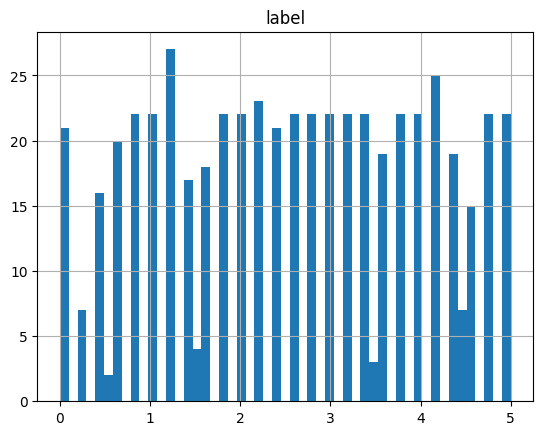

In [63]:
v0.hist(column='label', bins=51)